## E-Commerce Data Preliminary EDA

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 
import seaborn as sns
import datetime
import scipy.stats as stats

In [7]:
# Load data
customers = pd.read_csv("RawData/olist_customers_dataset.csv")
geoloc = pd.read_csv("RawData/olist_geolocation_dataset.csv")
items = pd.read_csv("RawData/olist_order_items_dataset.csv")
payments = pd.read_csv("RawData/olist_order_payments_dataset.csv")
reviews = pd.read_csv("RawData/olist_order_reviews_dataset.csv")
orders = pd.read_csv("RawData/olist_orders_dataset.csv")

### Customer data EDA

In [5]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
customers.shape

(99441, 5)

In [10]:
# No. unique customers
customer_uniq = customers["customer_unique_id"].nunique()
customer_uniq 

96096

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: customer_id, dtype: int64


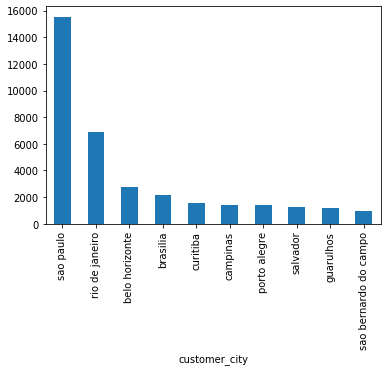

In [12]:
# No. unique cities
city = customers["customer_city"].nunique()
c1 = customers.groupby('customer_city')['customer_id'].nunique().sort_values(ascending=False)
c2 = c1.head(10)
print(c2) # Top10 cities
round(c2.sum()/customers.shape[0]*100,1) #% of orders Top10 cities cover
c2.plot(kind="bar")

In [19]:
# Top5 frequent deliveries
zips = customers.groupby('customer_zip_code_prefix')['customer_id'].nunique().sort_values(ascending=False)
zips.index[0:5]
zips.iloc[0:5]

customer_zip_code_prefix
22790    142
24220    124
22793    121
24230    117
22775    110
Name: customer_id, dtype: int64

### Payment data EDA

In [20]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [29]:
print(payments.describe())
print(payments["payment_type"].value_counts())

       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64


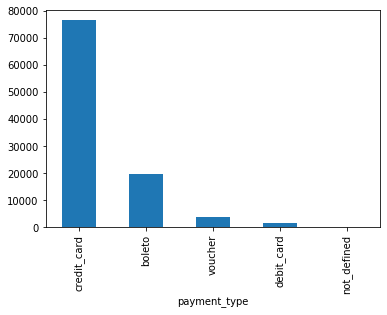

In [30]:
# No. order transactions by payment_type
payment_type = payments["payment_type"].nunique()
payment_type = payments.groupby('payment_type')['order_id'].nunique().sort_values(ascending=False)
payment_type.plot(kind="bar")

In [32]:
credit = payments[payments["payment_type"]=="credit_card"]
credit

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103879,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94
103880,7159096c5aa9be77f7f0c26c01ee9793,1,credit_card,4,280.65
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77


Text(0.5, 1.0, 'Histogram of installments count')

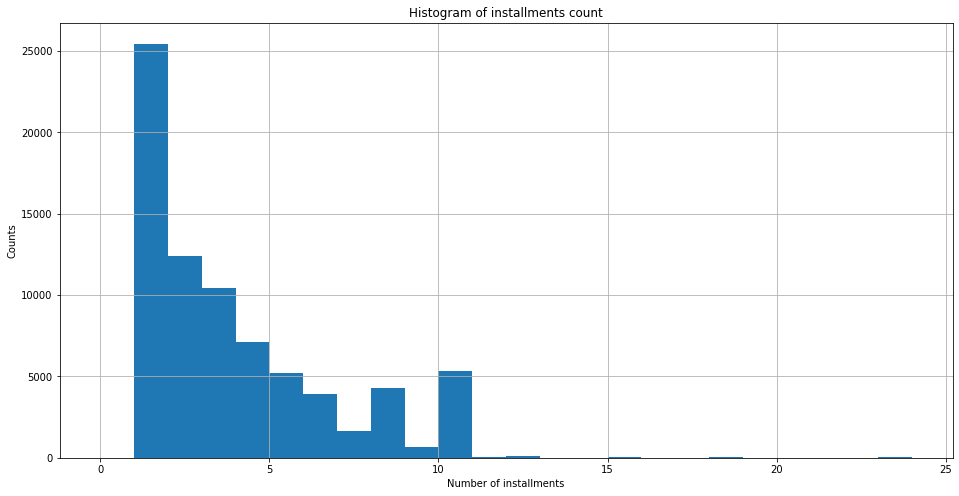

In [31]:
fig, ax = plt.subplots(figsize=(16,8))
credit.hist(column = "payment_installments", bins = credit["payment_installments"].max(), ax=ax)
plt.xlabel("Number of installments")
plt.ylabel("Counts")
plt.title("Histogram of installments count")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x132867da0>]],
      dtype=object)

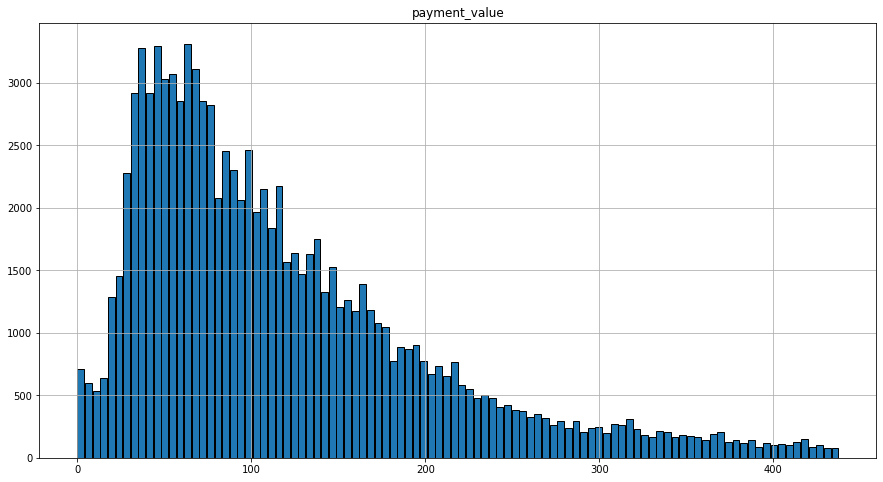

In [52]:
# Payment value distribution (.95 quantile)
q95 = payments["payment_value"].quantile(.95)
payments_q95 = payments[payments["payment_value"]<q95]
payments_q95.hist(column = "payment_value", bins = 100, figsize=(15,8), rwidth=0.9)

### Order data EDA

In [25]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [26]:
# Data type transformation
orders_upd = orders.copy()
orders_upd["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"], format='%Y-%m-%d %H:%M:%S')
orders_upd["order_delivered_carrier_date"] = pd.to_datetime(orders["order_delivered_carrier_date"], format='%Y-%m-%d %H:%M:%S')
orders_upd["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"], format='%Y-%m-%d %H:%M:%S')
orders_upd["order_estimated_delivery_date"] = pd.to_datetime(orders["order_estimated_delivery_date"], format='%Y-%m-%d %H:%M:%S')
orders_upd.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

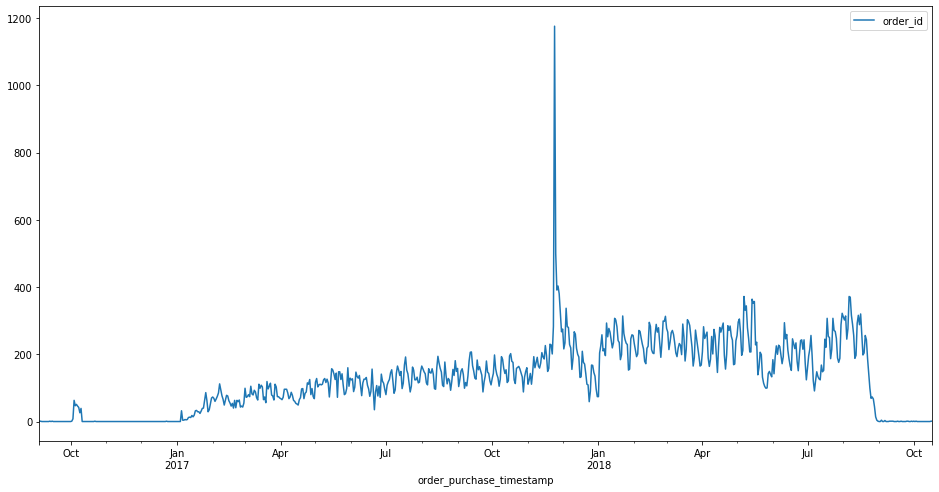

In [27]:
# No. of orders by "order_purchase_time"
counts = orders_upd.set_index("order_purchase_timestamp").groupby(pd.Grouper(freq='D')).count()
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
counts.plot(y = "order_id", use_index=True, ax=ax)

**Observations:** Most orders are placed in Dec around Christmas. 

In [50]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [60]:
# Delivery time transformation
def convert(db,columns_list):
    for column in columns_list:
        db[column] = pd.to_datetime(db[column])
        
orders_upd = orders.copy()
cols = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date',
        'order_delivered_customer_date','order_estimated_delivery_date']

convert(orders_upd, cols)
orders_upd['delivery_time'] = orders_upd['order_delivered_carrier_date'] - orders_upd['order_purchase_timestamp']

# Choose "delivered" orders
delivered = orders_upd[orders_upd["order_status"]=="delivered"]
delivered.set_index(delivered['order_purchase_timestamp'], inplace = True)
delivered = delivered.sort_index()
delivered["dts"] = delivered["delivery_time"].dt.total_seconds()
delivered = delivered["dts"].resample("D").mean()
delivered = round(delivered/86400,2)
delivered = delivered[delivered<8]
delivered.head()

order_purchase_timestamp
2016-12-23    3.29
2017-01-05    5.53
2017-01-06    2.93
2017-01-07    3.23
2017-01-08    2.89
Name: dts, dtype: float64

In [61]:
delivered.describe()

count    603.000000
mean       3.252405
std        0.855460
min        0.230000
25%        2.655000
50%        3.170000
75%        3.770000
max        6.480000
Name: dts, dtype: float64

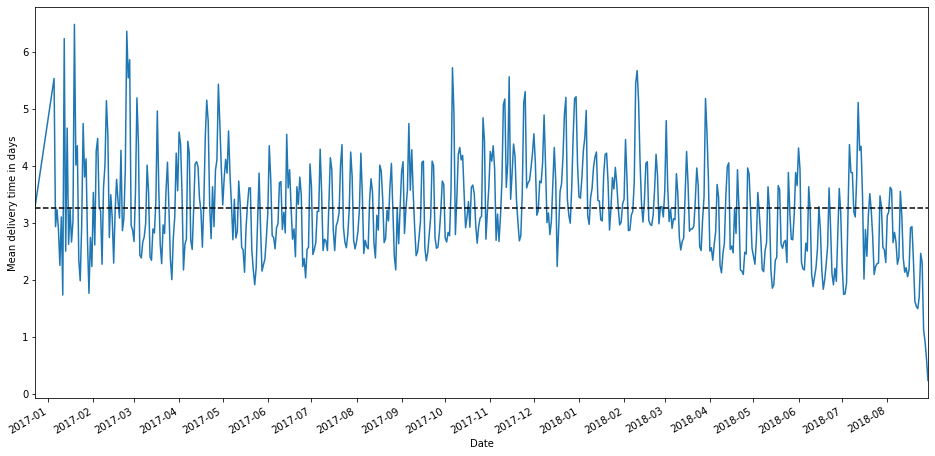

In [64]:
ax = delivered.plot(figsize=(16,8))
plt.axhline(delivered.mean(), color="k", linestyle='--')
plt.xlabel("Date")
plt.ylabel("Mean delivery time in days")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))